In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

### The MNIST digit classifier model

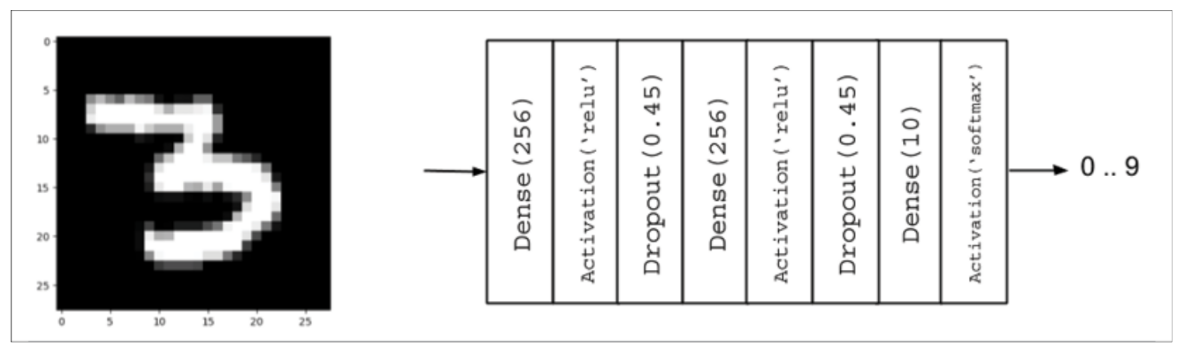

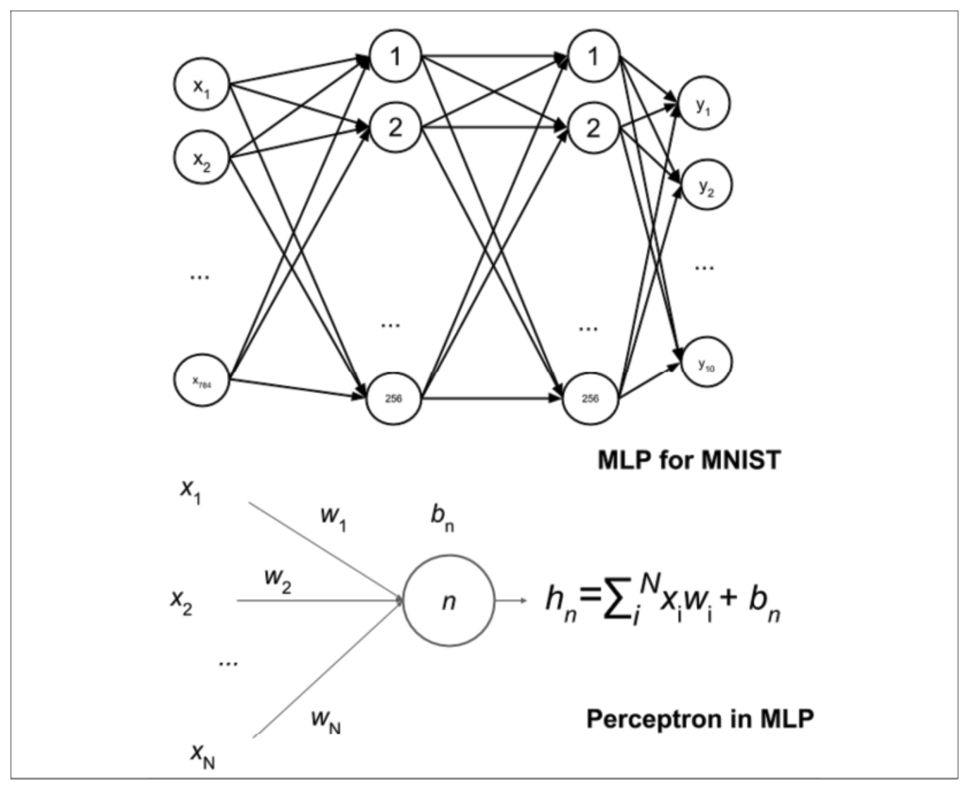

In [3]:
# The proposed MLP model shown in the first below figure can be used for MNIST digit classification.
# When the units or perceptrons are exposed, the MLP model is a fully connected network, as shown in the 
# second below figure. 
# We'll also show how the output of the perceptron is computed from inputs as a function of weights, wi,
# bias, bn, for the n-th unit.

plt.figure(figsize=(15, 6))
image_mp = mpimg.imread("../Image/MLP_MNIST_Classifier_1.png", "png")
plt.imshow(image_mp)
plt.axis("off")

plt.figure(figsize=(15, 10))
image_mp = mpimg.imread("../Image/MLP_MNIST_Classifier_2.png", "png")
plt.imshow(image_mp)
plt.axis("off")
plt.show()

### mlp-mnist model

In [27]:
# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#compute the number of labels
kind_labels = np.unique(y_train)
num_labels = len(np.unique(kind_labels))
print(f"label은 {kind_labels}로서 총 {num_labels}종류이다.")

label은 [0 1 2 3 4 5 6 7 8 9]로서 총 10종류이다.


In [28]:
for i in y_train[:2]:
    print(i, end=', ')
print()
    
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

for i in y_train[:2]:
    print(i, end=', ')

5, 0, 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.], 

In [29]:
# image dimensions(assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
print(f"input size는 {input_size}이다.")

input size는 784이다.


In [31]:
# resize and normalize
x_train = x_train.reshape(-1, input_size)    # (60000, 28, 28) ==> (60000, 784)
x_train = x_train.astype('float32') / 255
print(f"x_train의 shape은 {x_train.shape}이고 data type은 {x_train.dtype}이다.")

x_test = x_test.reshape(-1, input_size)
x_test = x_test.astype('float32') / 255
print(f"x_test의 shape은 {x_test.shape}이고 data type은 {x_test.dtype}이다.")

x_train의 shape은 (60000, 784)이고 data type은 float32이다.
x_test의 shape은 (10000, 784)이고 data type은 float32이다.


In [32]:
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

In [34]:
# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()

model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Dense(num_labels))
model.add(Activation('softmax'))     # this is the output for one-hot vector

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 activation_2 (Activation)   (None, 256)               0         
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 activation_3 (Activation)   (None, 256)               0         
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 10)               